# **House Prices Prediction**



## Overview

The number of property companies makes the competition in buying and selling a house even tighter. To be able to compete in determining the price of a house, the company asks the services of a vendor to find out what factors affect the ups and downs of the price of a house. And from these factors it is hoped that the output will be a more accurate prediction of the price of a house.

### Acknowledgments

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.


### Dataset

This dataset is obtained from kaggle --> [link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)


Data description:

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: $Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

## General Process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library & Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('/content/drive/MyDrive/Digital Skola/House Price Prediction/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Digital Skola/House Price Prediction/test.csv')

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Exploratory Data Analyst

### Info Data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
colobj = ['MSSubClass','OverallQual','OverallCond']
for i in colobj:
  df_train[i] = df_train[i].astype(str)

In [ ]:
df_train.loc[df_train.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [ ]:
df_train.drop('Id', axis=1, inplace=True)

In [ ]:
df_train.isnull().sum() > 0

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

### Univariate Analysis

In [ ]:
# Countplot function to perform Univariate analysis
def plotUnivariate(datax):
  Total = len(df_train[datax])
  ax = sns.countplot(x = datax, data = df_train, palette = 'mako')
  ax.set_facecolor('#faf9f4')
  #plt.rcParams['font.size'] = '14'
  for p in ax.patches:
      percentage = f'{100 * p.get_height() / Total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()

      ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11)

  ax.set_xlabel(datax, fontsize=14)
  ax.set_ylabel('Count',fontsize=14)
  plt.title(f'{datax} Distribution', fontsize=14)

#### Target Variable (SalePrice)

In [ ]:
df_train['SalePrice'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]).map('{:.0f}'.format)

count      1460
mean     180921
std       79443
min       34900
25%      129975
50%      163000
75%      214000
85%      250000
90%      278000
100%     755000
max      755000
Name: SalePrice, dtype: object

<Axes: xlabel='SalePrice', ylabel='Density'>

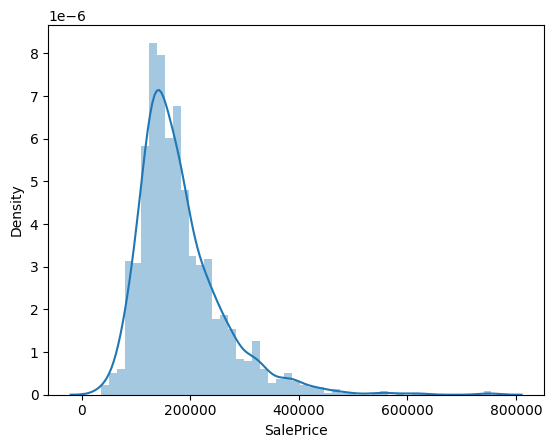

In [ ]:
sns.distplot(df_train['SalePrice'])

##### Skweness dan Kurtosis variabel target

In [ ]:
df_train['SalePrice'].agg(['skew','kurtosis']).transpose()

skew        1.882876
kurtosis    6.536282
Name: SalePrice, dtype: float64

Skewness to measure distribution symmetry (normal = 0)
*   Skewness > 0 positive (sticks to the right)
*   Skewness < 0 negative (sticks to the left)

Kurtosis to measure how sharp/sloping the distribution is (normal = 3)


*   Kurtosis > 3 tapers / Leptokurtic (kurtosis positive)
*   Kurtosis < 3 ramps / Platykurti (negative kurtosis)



#### Predictor Variable

In [ ]:
cols = df_train.columns
col_obj = []
col_num = []
for i in cols:
  if df_train[i].dtypes == object :
    col_obj.append(i)
  else:
    col_num.append(i)


##### Category

<function matplotlib.pyplot.show(close=None, block=None)>

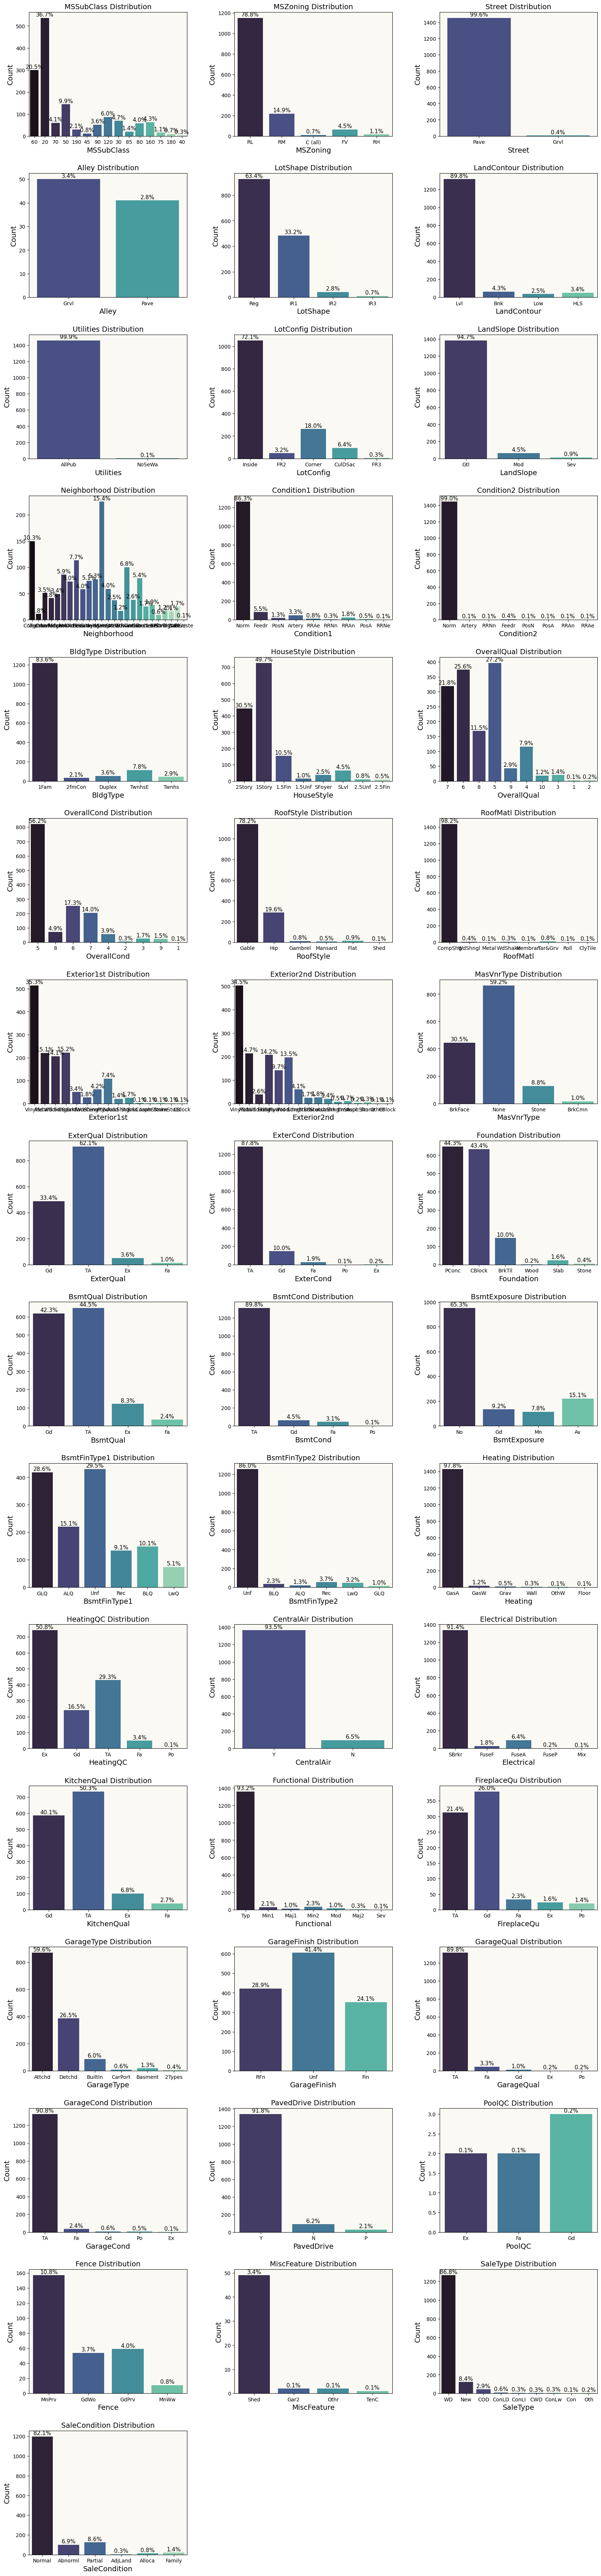

In [ ]:
plt.figure(figsize=(20, 90))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(col_obj):
    ax = plt.subplot(16, 3, n + 1)
    plotUnivariate(col)

plt.show

##### Numeric

<function matplotlib.pyplot.show(close=None, block=None)>

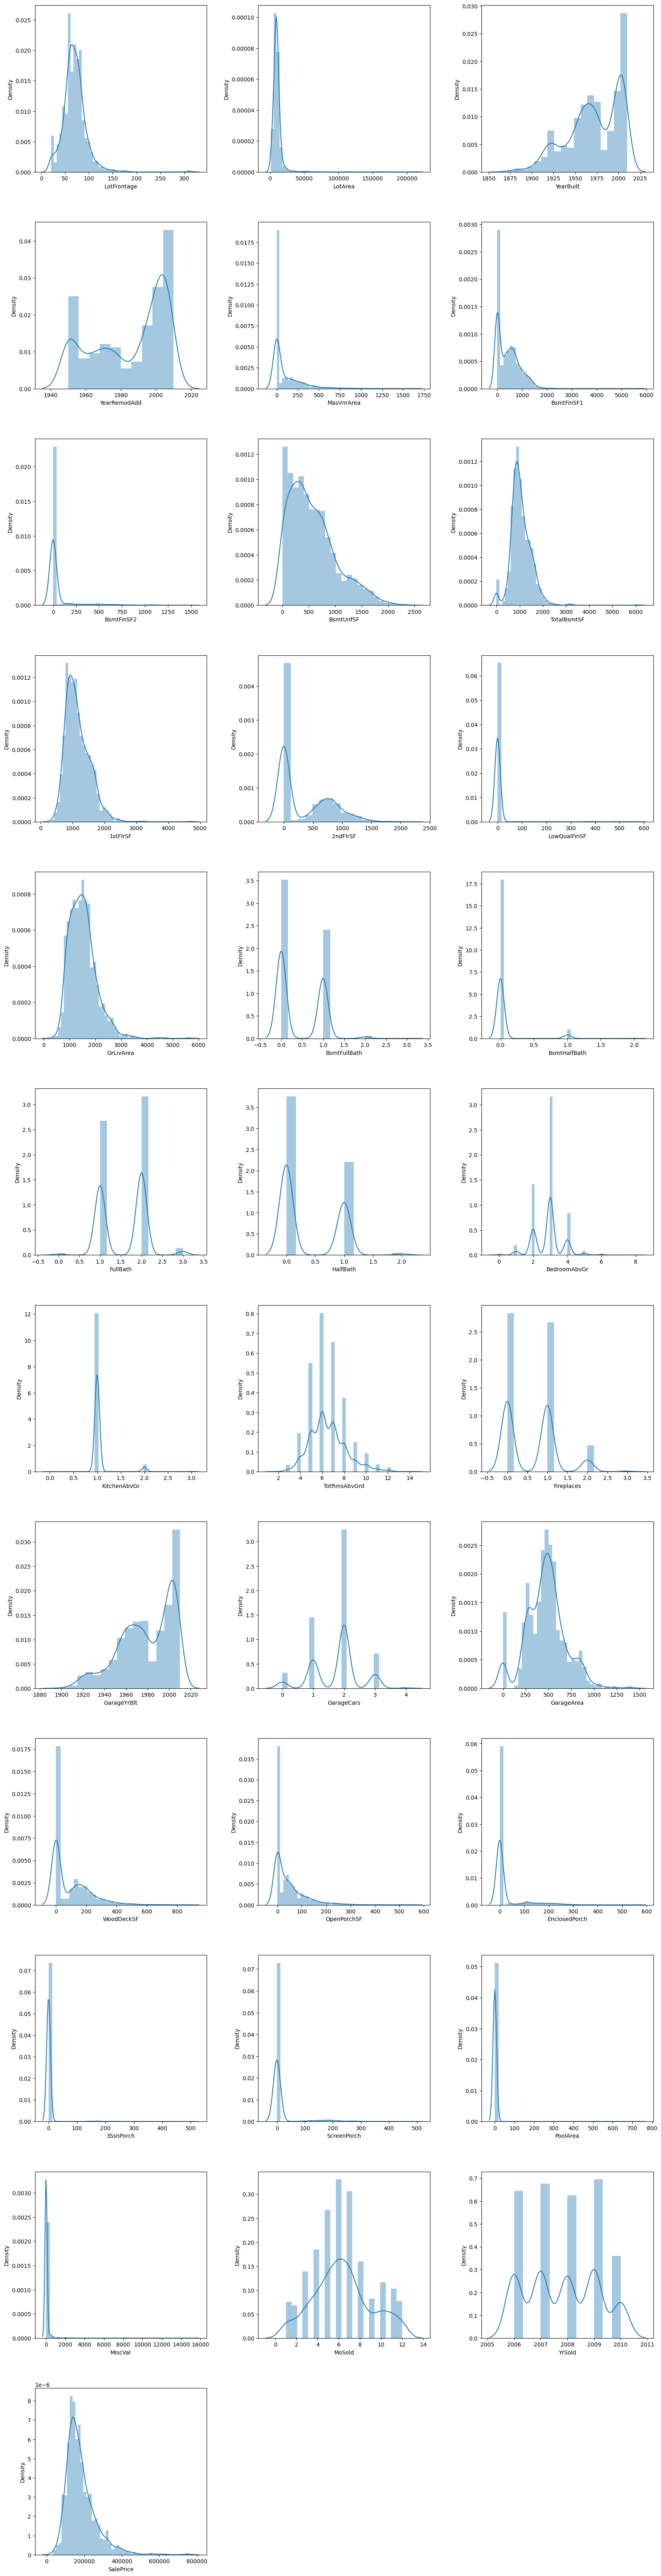

In [ ]:
plt.figure(figsize=(20, 90))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(col_num):
    plt.subplot(13, 3, n + 1)
    sns.distplot(x = df_train[col], kde=True)
    plt.xlabel(col)
plt.show

### Bivariate Analysis

##### Categorical

<function matplotlib.pyplot.show(close=None, block=None)>

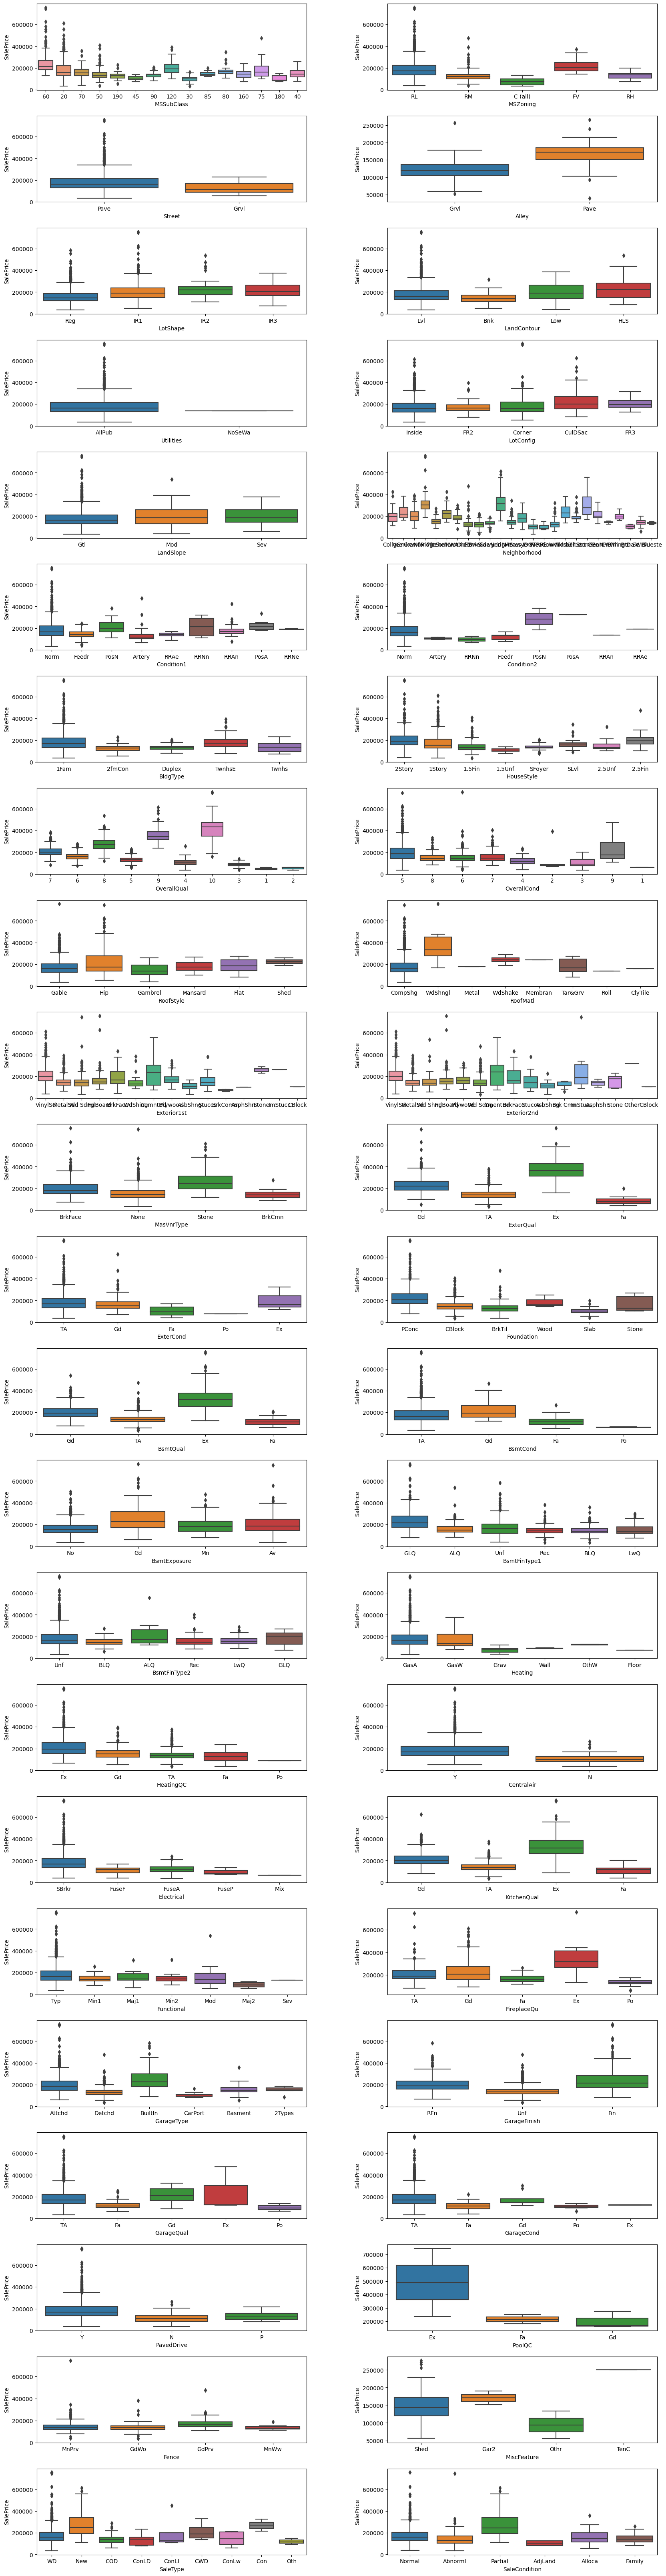

In [ ]:
plt.figure(figsize=(20, 90))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(col_obj):
      ax = plt.subplot(25, 2, n + 1)
      sns.boxplot(x=col, y="SalePrice", data=df_train)

plt.show

Notes:


* MSSubClass, MSZoning affects SalePrice.
* Street, Alley affects SalePrice.
* LotShape doesn't much affects SalePrice.
* LandContour affects SalePrice.
* Utilities affects SalePrice.
* LotConfig affects SalePrice.
* LandSlope doesn't much affects SalePrice.
* Neighborhood affects SalePrice.
* Condition1 and Condition2 affects SalePrice.
* BldgType doesn't much affects SalePrice.
* HouseStyle affects SalePrice.
* OverallQual and OverallCond affects SalePrice.
* RoofStyle doesn't much affects SalePrice.
* RoofMatl affects SalePrice.
* Exterior1 and Exterior2 affects SalePrice.
* MasVnrType affects SalePrice.
* ExterQual affects SalePrice.
* ExterCond affects SalePrice.
* Foundation affects SalePrice.
* BsmtQual and BsmtCond affects SalePrice.
* BsmtExposure affects SalePrice.
* BsmtFinType1 and BsmtFinType2 affects SalePrice.
* Heating and HeatingQC affects SalePrice.
* CentralAir affects SalePrice.
* Electrical affects SalePrice.
* KitchenQual affects SalePrice.
* Functional doesn't affects SalePrice.
* FirePlaceQu affects SalePrice.
* GarageType affects SalePrice.
* GarageFinish affects SalePrice.
* GarageQual affects SalePrice.
* GarageCond affects SalePrice.
* PavedDrive affects SalePrice.
* Fence doesn't much affects SalePrice.
* MiscFeature affects SalePrice.
* SaleType affects SalePrice.
* SaleCondition affects SalePrice.



#### Numerical

<function matplotlib.pyplot.show(close=None, block=None)>

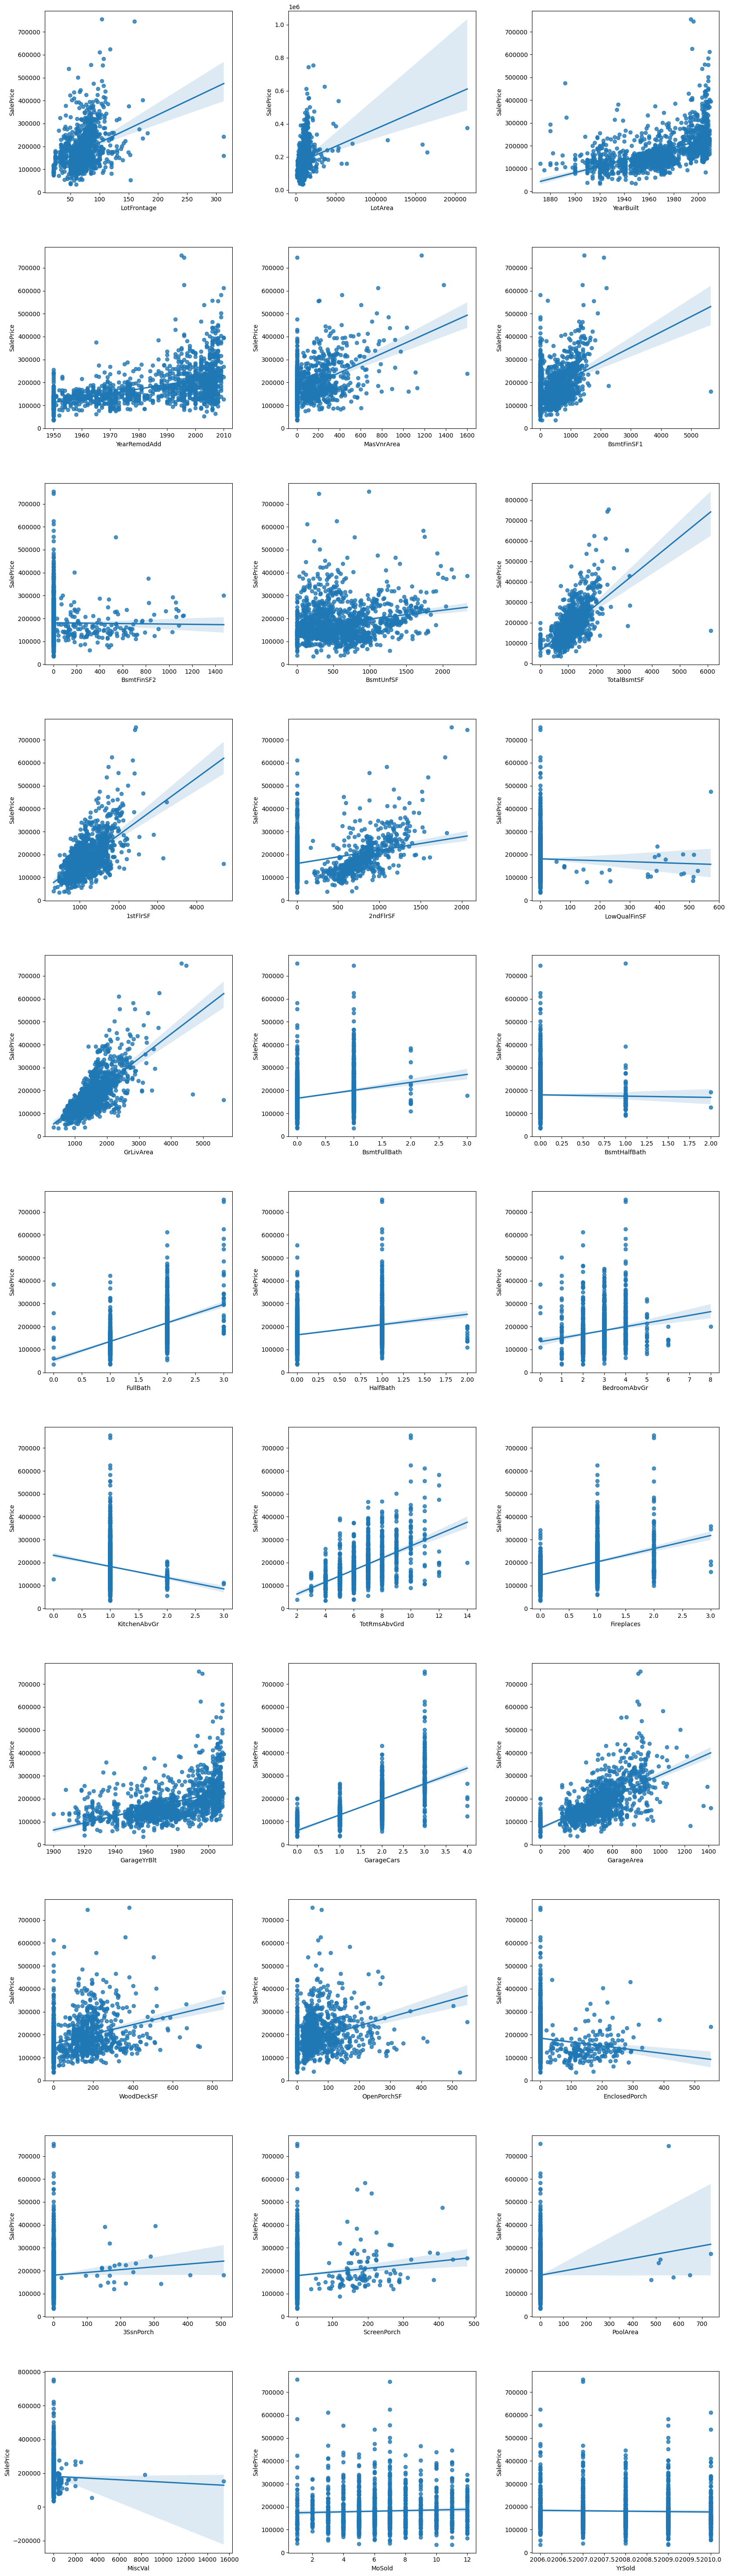

In [ ]:
plt.figure(figsize=(20, 90))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(col_num):
    if col != 'SalePrice':
      plt.subplot(13, 3, n + 1)
      sns.regplot(data=df_train, x = col, y='SalePrice')
      plt.xlabel(col)

plt.show

Notes:

* LotFrontage affects SalePrice.
* LotArea affects SalePrice.
* YearBuilt affects SalePrice.
* YearRemodAdd affects SalePrice.
* MasVnrArea affects SalePrice.
* BsmtFinSF1 affects SalePrice.
* BsmtFinSF2 doesn't much affects SalePrice.
* BsmtUnfSF doesn't much affects SalePrice.
* TotalBsmtSF affects SalePrice.
* 1stFlrSF affects SalePrice.
* 2ndFlrSF affects SalePrice.
* LowQualFinSF doesn't much affects SalePrice.
* GrLivArea affects SalePrice.
* BsmtFullBath affects SalePrice.
* BsmtHalfBath doesn't much affects SalePrice.
* FullBath affects SalePrice.
* HalfBath affects SalePrice.
* BedroomAbvGr affects SalePrice.
* KitchenAbvGr affects SalePrice.
* TotRmsAbvGr affects SalePrice.
* Fireplaces affects SalePrice.
* GarageYrBlt affects SalePrice.
* GarageCars affects SalePrice.
* GarageArea affects SalePrice.
* WoodDeckSF affects SalePrice.
* OpenPorchSF affects SalePrice.
* EnclosedPorch affects SalePrice.
* 3SsnPorch doesn't much affects SalePrice.
* ScreenPorch affects SalePrice.
* PoolArea affects SalePrice.
* MiscVal doesn't much affects SalePrice.
* MoSold doesn't much affects SalePrice.
* YearSold doesn't much affects SalePrice.


#### Pairplot several variables with a correlation > 0.5 to the target variable

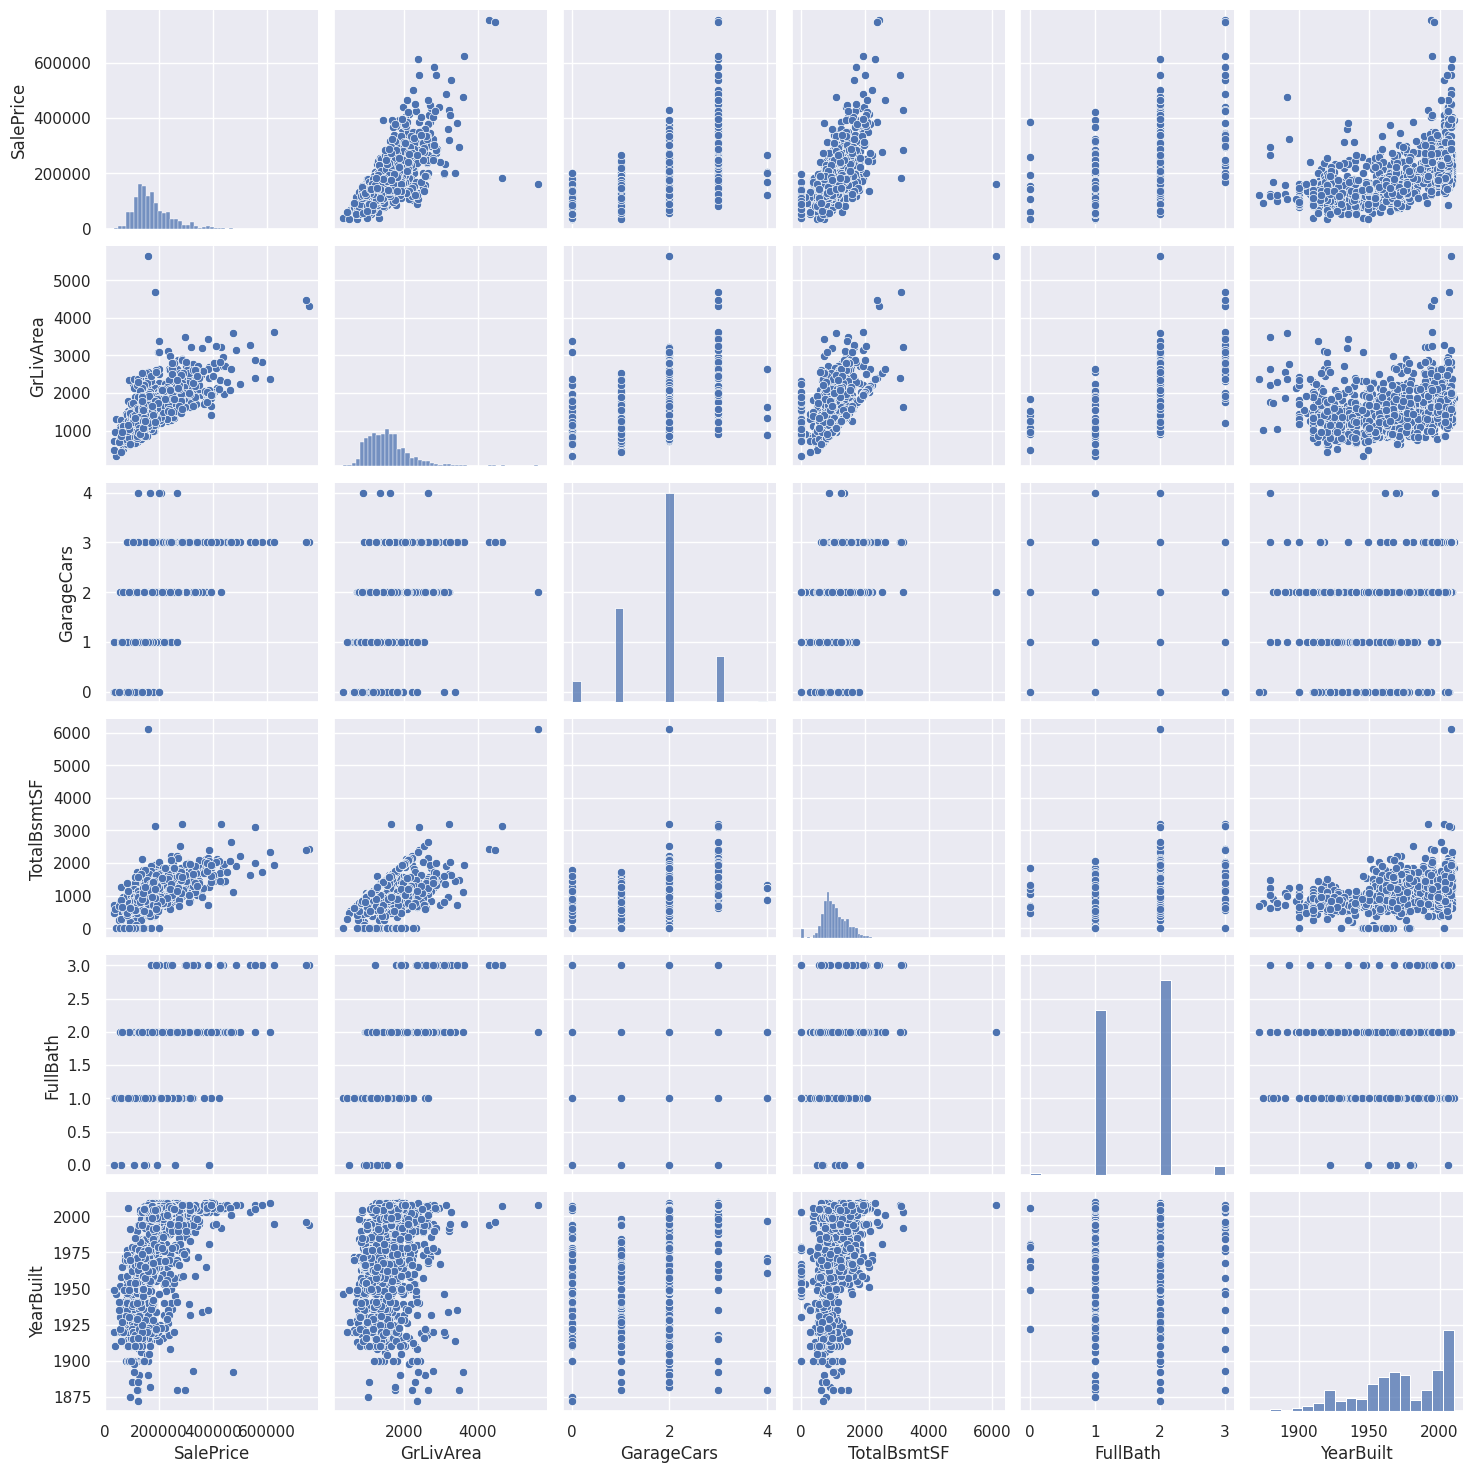

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Data Prepocessing

### Combining Train and Test Data

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice','Id'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


### Calculating missing data

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtExposure     82  0.028092
BsmtCond         82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
Functional        2  0.000685

### Missing value treatment

#### Missing Value Categorical (NA)

In [ ]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

#### Missing Value Numeric (NA)

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

#### Missing Value No Categorical Info --> Mode

In [ ]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

#### Missing Value No Numerical Info ---> Median

In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#### Missing Functional value is filled with Typ

In [ ]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#### Remove/Drop unused/no effect columns

Remove the utilities column as it's almost all AllPub

In [ ]:
all_data.groupby('Utilities').size()

Utilities
AllPub    2916
NoSeWa       1
dtype: int64

In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)

#### Check the remaining missing values

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

There are no missing values ​​remaining

### Change the numeric data type to categorical

In [ ]:
#MSSubClass=The building class
#all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
#all_data['YrSold'] = all_data['YrSold'].astype(str)
#all_data['MoSold'] = all_data['MoSold'].astype(str)

### Feature Engineering

#### Correlation Map


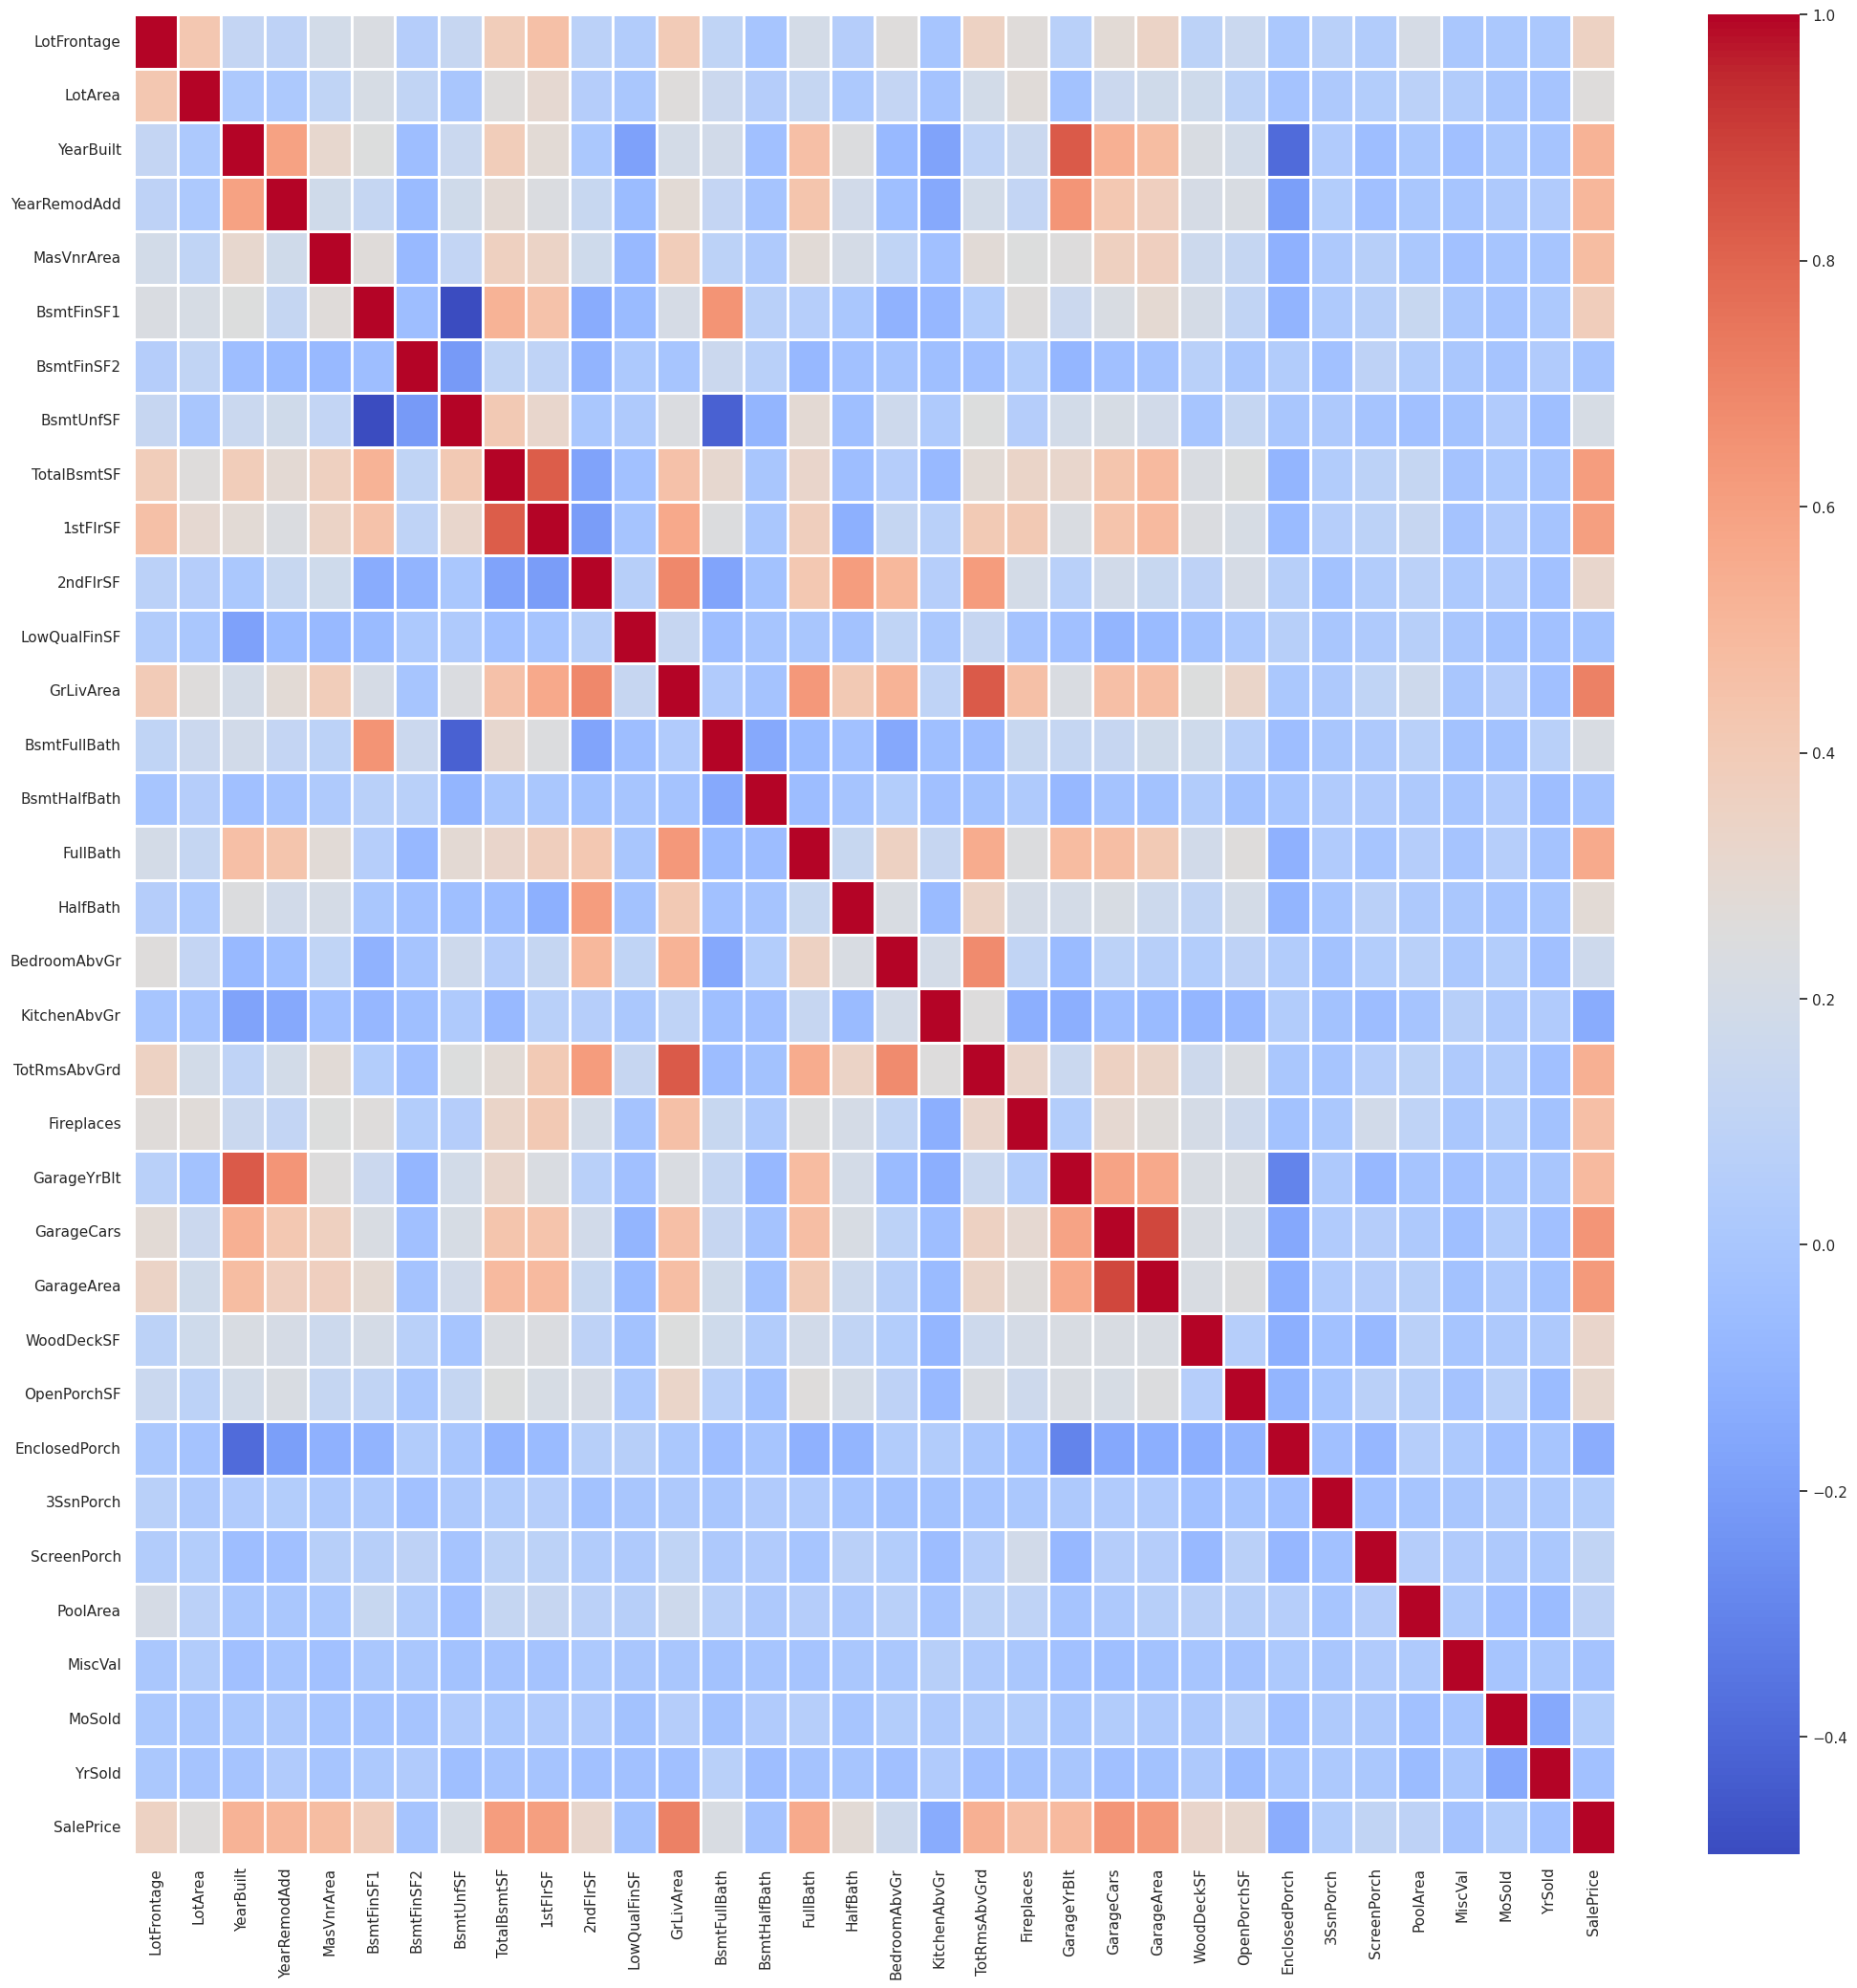

In [ ]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(), cmap = "coolwarm", annot=False, linewidth=2)

Notes:

*   GarageArea & GarageCars has strong corelation (multicollinearity)

*   GarageYrBlt & YearBuilt has strong corelation (multicollinearity)



##### Correlation Map which correlates to the target variable >= 0.5

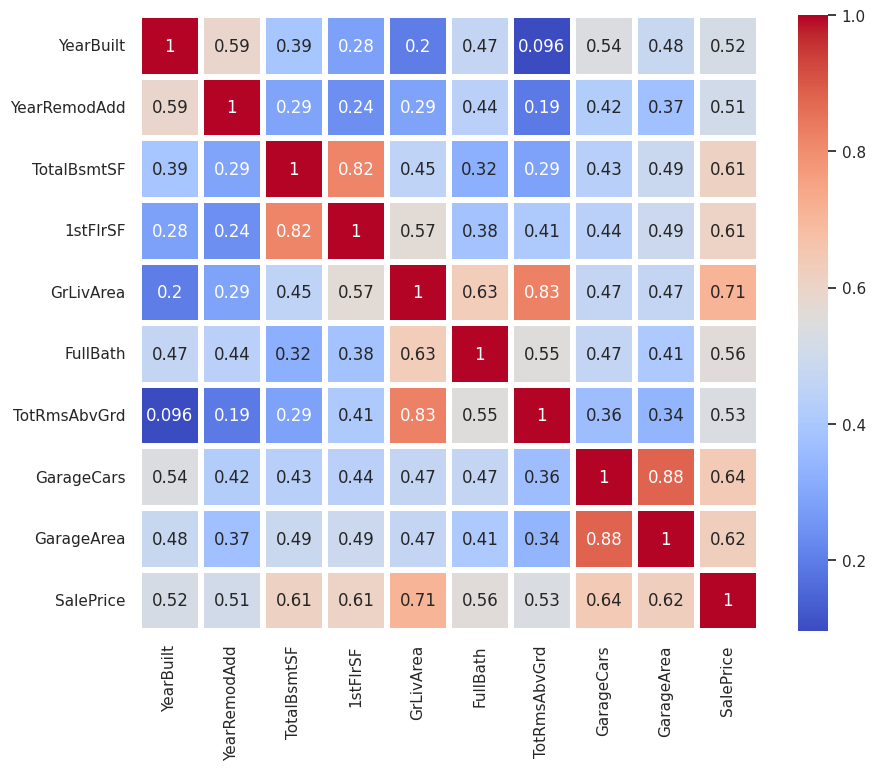

In [ ]:
hig_corr = df_train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

Notes:

* GrLivArea & TotRmsAbvGrd has strong corelation (multicollinearity).
* TotalBsmtSF & 1stFlrSF has strong corelation (multicollinearity).

##### Added new column 'TotalSF' where TotalSF = TotalBsmtSF + 1stFlr + 2ndFlSF

In [ ]:
# Adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

##### Drop feature that doesn't much affect target

In [ ]:
PoorFeature = ['TotRmsAbvGrd','GarageCars','LotShape','LandSlope','BldgType','RoofStyle','Functional','Fence',
               'BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','3SsnPorch','MiscVal','MoSold','YrSold',
               'TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageYrBlt']
all_data_fix = all_data.drop(PoorFeature, axis=1)
all_data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  OverallQual    2919 non-null   object 
 13  OverallCond    2919 non-null   object 
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  RoofMatl       2919 non-null   object 
 17  Exterior1st    2919 non-null   object 
 18  Exterior

#### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = all_data_fix.columns

# process columns, apply LabelEncoder to categorical features
for c in cols:
  if all_data_fix[c].dtypes == object :
    lbl = LabelEncoder()
    lbl.fit(list(all_data_fix[c].values))
    all_data_fix[c] = lbl.transform(list(all_data_fix[c].values))

# shape
print('Shape all_data: {}'.format(all_data_fix.shape))

Shape all_data: (2919, 59)


### Scalling


#### Using Robust Scalling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(all_data_fix)
all_data_fix = scaler.transform(all_data_fix)

In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

#### Separate again between Train and Test Data

In [ ]:
X_train = all_data_fix[:ntrain]
X_test = all_data_fix[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 59), (1459, 59), (1460,))

## Modelling

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [ ]:
models = {'Linier Regression': linear_model.LinearRegression(),
         'Ridge Regression': linear_model.Ridge(),
         'Lasso Regressione': linear_model.Lasso(alpha=1e-4),
         'SVM': SVR(),
         'Random Forest': RandomForestRegressor(),
         'Gradient Boosting':GradientBoostingRegressor(),
         'Ada Boost': AdaBoostRegressor(),
         'Bagging Classifier': BaggingRegressor(),
         'XGBoost': XGBRegressor()}

In [ ]:
def fit_score(models, X_train, y_train):

    cv = KFold(n_splits = 10, shuffle=True, random_state = 45)
    model_scores = {}
    for name, model in models.items():
        r2 = make_scorer(r2_score)

        r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
        model_scores[name] = [r2_val_score.mean()]
    return model_scores

In [ ]:
model_scores = fit_score(models,X_train,y_train)
model_scores

{'Linier Regression': [0.7211860660779641],
 'Ridge Regression': [0.7300736823901662],
 'Lasso Regressione': [0.7211860715015602],
 'SVM': [-0.05333617931416164],
 'Random Forest': [0.8541968606075206],
 'Gradient Boosting': [0.87024200881133],
 'Ada Boost': [0.8049110854510664],
 'Bagging Classifier': [0.8490141588742229],
 'XGBoost': [0.8405456697401885]}

Notes :

*   Gradient Boosting Regressor has the best accuracy among other models (0.8702/ 87,02 %).

*   The accuracy obtained is quite good. So we can choose the Gradient Boosting Regressor model as our prediction model.

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#error from linear regression of training data

print("MSE results : ",mean_squared_error(y_train, y_pred_train))
print("RMSE results : ", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE results : ", mean_absolute_error(y_train, y_pred_train))
print("R2Score results: ", r2_score(y_train, y_pred_train))

MSE results :  219175607.5452609
RMSE results :  14804.580627132296
MAE results :  10669.55404654723
R2Score results:  0.9652476685116087


Notes:

R2Score results:  0.9652476685116087, it means that our model is good, more of the variation in the dependent variable is explained by the independent variables in the regression model.

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([127765.99685412, 166310.90574532, 182838.18634733, ...,
       161548.80822908, 128985.80089958, 216621.08651334])

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

GBR=GradientBoostingRegressor()
crossvalidation=KFold(n_splits=4,shuffle=True,random_state=42)
search_grid = {'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[42]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [ ]:
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 42,
 'subsample': 0.5}

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=2000,subsample=0.5,random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=2000,
                          random_state=42, subsample=0.5)

In [ ]:
cv = KFold(n_splits = 10, shuffle=True, random_state = 45)
r2 = make_scorer(r2_score)
r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
model_scores = [r2_val_score.mean()]
model_scores

[0.8806269340703556]

In [ ]:
y_pred_train = model.predict(X_train)
print("MSE results : ",mean_squared_error(y_train, y_pred_train))
print("RMSE results : ", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE results : ", mean_absolute_error(y_train, y_pred_train))
print("R2Score results: ", r2_score(y_train, y_pred_train))

MSE results :  59469308.89876755
RMSE results :  7711.634645052082
MAE results :  6038.002711113161
R2Score results:  0.9905705878524428


Notes :

*  After tuning Gradient Boosting Regressor has the best accuracy 0.8806/ 88.06 %. Increase 1,04%.
* Followed by an increase in the R square score to 99%, indicating that the model we use is very good.
*  So we will use algorithm model Gradient Boosting Regressor for deployment.

In [ ]:
import pickle
pickle.dump(model, open('gbr.pkl','wb'))